In [25]:
import numpy as np
import matplotlib as mt

In [26]:
data_test = np.genfromtxt('lab_1_test.csv', delimiter=',')
data_train = np.genfromtxt('lab_1_train.csv', delimiter=',')

In [27]:
data_train = np.delete(data_train, 0, 0)
data_test = np.delete(data_test, 0, 0)

In [28]:
x_train = data_train[:, 1]
y_train = data_train[:, 2]
train_indx = data_train[:, 0]
x_test = data_test[:, 1]
y_test = data_test[:, 2]
test_indx = data_test[:, 0]
x_all = np.concatenate((x_train, x_test), axis = 0)
y_all = np.concatenate((y_train,y_test), axis = 0)

In [29]:
y_train_ampl = max(y_train)-min(y_train)
print(max(y_train))
print(min(y_train))
print(y_train_ampl)

21.484582730055898
19.688642189228922
1.795940540826976


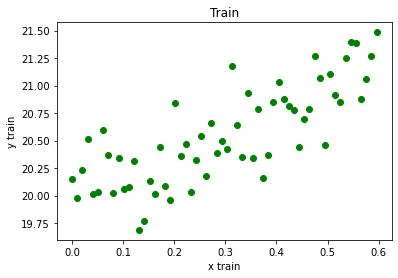

In [30]:
from matplotlib import pyplot as plt 
plt.title("Train") 
plt.xlabel("x train") 
plt.ylabel("y train") 
plt.plot(x_train,y_train,'go') 
plt.show()

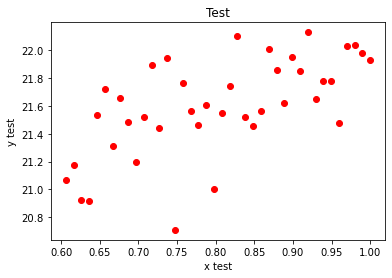

In [31]:

plt.title("Test") 
plt.xlabel("x test") 
plt.ylabel("y test") 
plt.plot(x_test,y_test,'ro') 
plt.show()

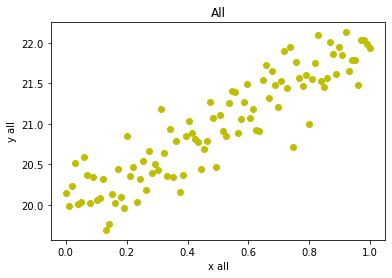

In [32]:
plt.title("All") 
plt.xlabel("x all") 
plt.ylabel("y all") 
plt.plot(x_all,y_all,'yo') 
plt.show()

In [33]:
#коеффициенты регресси. Берем случайные, или же а=0, b=1
a = np.random.randn(1)
#a = 0
b = np.random.randn(1)
#b = 1
print(a,b)

[-0.42927202] [2.66212951]


In [34]:
def reg_funk1(x, a, b ):
    return a + b*x

def rmse_calk(x, y, a, b):
    sum_error = 0
    for indx in range(x.size):
        sum_error = sum_error + (y[indx] - reg_funk1(x[indx], a, b))**2
        
    rmse_1 = np.sqrt(sum_error/x.size)
    cv_1 = rmse_1/ y.mean()
    print('RMSE: ')
    print(rmse_1)
    print('CV: ')
    print(cv_1)
    return rmse_1

In [35]:
rmse_train = rmse_calk(x_train, y_train, a, b)
#https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e#40de                      

RMSE: 
[20.18773732]
CV: 
[0.98239253]


In [36]:
# скорость обучения
lr = 0.01
# количество эпох. задается максимум, чтобы хоть когда-то остановиться, но если сойдется раньше - выйдет из цикла
n_epochs = 100000
eps = 0.0001 #точность для 
# основной цикл
i = 0

for epoch in range(n_epochs):
    i = i+1
    #rmse_train = rmse_calk(x_train, y_train, a, b)   
    #print(rmse_train)
    error = (y_train - reg_funk1(x_train, a, b))
    #print("Current avg error: " + str(error.mean()))
    # считаем градиенты (по производной)
    # для коэффициента a
    a_grad = -2 * error.mean()
    # для коэффициента b
    b_grad = -2 * (x_train * error).mean()
    #точка остановки по градиенту - более рациональна, так как зачение весов продолжительное время не меняется
    if abs(a_grad)<eps and abs(b_grad)<eps:
        print("optimal result")
        break
    a = a - lr * a_grad
    b = b - lr * b_grad
    #print("Current a: " + str(a))
    #print("Current b: " + str(b))
   



optimal result


In [37]:
print(a,b) 
print("all epoches: "+str(i))

[19.95937872] [1.98056764]
all epoches: 14577


In [38]:
#Ошибки на трейн выборке
rmse_calk(x_train,y_train, a, b)

RMSE: 
[0.27025019]
CV: 
[0.01315114]


array([0.27025019])

In [39]:
#Ошибки на тестовой выборке
rmse_calk(x_test,y_test, a, b)

RMSE: 
[0.27478507]
CV: 
[0.01272284]


array([0.27478507])

Значение rmse на тестовой выборке достаточно большой. Но коеффициент вариации(rmse, нормированное по среднему), в районе 1%. Что является допустимым результатом. 

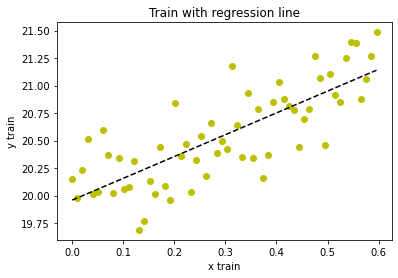

In [40]:

plt.title("Train with regression line") 
plt.xlabel("x train") 
plt.ylabel("y train")
plt.plot(x_train,y_train, 'yo', x_train, reg_funk1(x_train, a,b ), '--k')
plt.show()

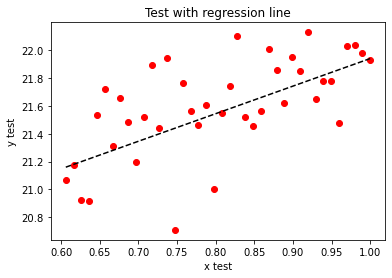

In [41]:
plt.title("Test with regression line") 
plt.xlabel("x test") 
plt.ylabel("y test")
plt.plot(x_test,y_test, 'ro', x_test, reg_funk1(x_test, a, b), '--k')
plt.show()

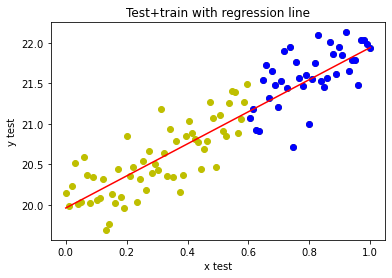

In [42]:
plt.title("Test+train with regression line") 
plt.xlabel("x test") 
plt.ylabel("y test")
#reg_funk1(x_test, a, b ), '-r',
plt.plot(x_all,y_all, 'yo', x_test,y_test,'bo', x_all, reg_funk1(x_all, a, b ), '-r')
plt.show()